In [ ]:
#import libaries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('seaborn')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots
#import tensorflow_docs.modeling


In [ ]:
from sklearn.decomposition import PCA
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [ ]:
#from sklearn.metrics import max_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from collections import Counter
from scipy import stats

In [ ]:
datac=pd.read_csv("/content/climacell_data_formodel.csv")

In [ ]:
Y=pd.read_csv("/content/climacell_data_formodel.csv")

In [ ]:
Y=Y["irradiance"]

In [ ]:
datac.describe().T

,count,mean,std,min,25%,50%,75%,max
irradiance,2952.0,118.702913,118.714366,0.00,10.00,90.00,190.00,373.00
ambient_temp,2952.0,29.538144,1.011530,26.39,28.98,29.62,30.19,33.42
wind_speed,2952.0,5.155610,1.781745,0.37,4.05,5.04,5.84,12.34


In [ ]:
datac.head()

,date_time,date,time,irradiance,ambient_temp,wind_speed
0,2020-08-20 06:05:00+05:30,20-08-2020,06:05:00,0,28.58,6.33
1,2020-08-20 06:10:00+05:30,20-08-2020,06:10:00,0,28.57,6.26
2,2020-08-20 06:15:00+05:30,20-08-2020,06:15:00,0,28.57,6.18
3,2020-08-20 06:20:00+05:30,20-08-2020,06:20:00,0,28.56,6.11
4,2020-08-20 06:25:00+05:30,20-08-2020,06:25:00,0,28.56,6.03


In [ ]:
import time
import datetime
def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S+05:30").timetuple())
datac["unix_time"]=[float(convert_to_unix(x)) for x in datac['date_time'].values]
datac["unix_time"]=datac["unix_time"].apply(lambda x: '%.0f' % x).astype("int")

In [ ]:
datac["hour"]=pd.to_datetime(datac["unix_time"],unit="s").dt.hour
datac["min"]=pd.to_datetime(datac["unix_time"],unit="s").dt.minute
datac["sec"]=pd.to_datetime(datac["unix_time"],unit="s").dt.second

In [ ]:
draft.columns

Index(['irradiance_x', 'ambient_temp_x', 'wind_speed_x', 'unix_time_x',
       'min_x', 'sec_x', 'irradiance_y', 'ambient_temp_y', 'wind_speed_y',
       'unix_time_y', 'min_y', 'sec_y'],
      dtype='object')

In [ ]:
draf=datac.groupby(["date","hour"]).median()

In [ ]:
datac=pd.merge(datac,draf,on=["date","hour"])

In [ ]:
datac

,date_time,date,time,irradiance_x,ambient_temp_x,wind_speed_x,unix_time_x,hour,min_x,sec_x,irradiance_y,ambient_temp_y,wind_speed_y,unix_time_y,min_y,sec_y
0,2020-08-20 06:05:00+05:30,20-08-2020,06:05:00,0,28.58,6.33,1597903500,6,5,0,0.0,28.570,6.110,1.597905e+09,30.0,0.0
1,2020-08-20 06:10:00+05:30,20-08-2020,06:10:00,0,28.57,6.26,1597903800,6,10,0,0.0,28.570,6.110,1.597905e+09,30.0,0.0
2,2020-08-20 06:15:00+05:30,20-08-2020,06:15:00,0,28.57,6.18,1597904100,6,15,0,0.0,28.570,6.110,1.597905e+09,30.0,0.0
3,2020-08-20 06:20:00+05:30,20-08-2020,06:20:00,0,28.56,6.11,1597904400,6,20,0,0.0,28.570,6.110,1.597905e+09,30.0,0.0
4,2020-08-20 06:25:00+05:30,20-08-2020,06:25:00,0,28.56,6.03,1597904700,6,25,0,0.0,28.570,6.110,1.597905e+09,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,2020-10-20 11:40:00+05:30,20-10-2020,11:40:00,322,30.24,3.10,1603194000,11,40,0,281.0,30.225,2.985,1.603193e+09,27.5,0.0
2948,2020-10-20 11:45:00+05:30,20-10-2020,11:45:00,322,30.25,3.14,1603194300,11,45,0,281.0,30.225,2.985,1.603193e+09,27.5,0.0
2949,2020-10-20 11:50:00+05:30,20-10-2020,11:50:00,322,30.26,3.19,1603194600,11,50,0,281.0,30.225,2.985,1.603193e+09,27.5,0.0
2950,2020-10-20 11:55:00+05:30,20-10-2020,11:55:00,322,30.26,3.24,1603194900,11,55,0,281.0,30.225,2.985,1.603193e+09,27.5,0.0


In [ ]:
datac=datac[['date_time', 'date', 'time', 'ambient_temp_x','ambient_temp_y',
       'wind_speed_x', 'wind_speed_y',"hour","min_x","sec_x"]]

In [ ]:
datac=datac.rename(columns={'ambient_temp_x':"temp","ambient_temp_y":"temp_median_hr","wind_speed_x":"speed","wind_speed_y":"speed_median_hr"})

In [ ]:
draf=datac.groupby(["date","hour"]).mean()

In [ ]:
datac=pd.merge(datac,draf,on=["date","hour"])

In [ ]:
datac.columns

Index(['date_time', 'date', 'time', 'temp_x', 'temp_median_x', 'speed_x',
       'speed_median_x', 'hour', 'min_x_x', 'sec_x_x', 'temp_y',
       'temp_median_y', 'speed_y', 'speed_median_y', 'min_x_y', 'sec_x_y'],
      dtype='object')

In [ ]:
datac=datac[['date_time', 'date', 'time', 'temp_x', 'temp_median_x', 'speed_x',
       'speed_median_x', 'hour',"min_x_x","sec_x_x","speed_y","temp_y"]]

In [ ]:
datac=datac.rename(columns={'temp_x':"temp", 'temp_median_x':"temp_median", 'speed_x':"speed",
       'speed_median_x':"speed_median", 'hour':"hour","min_x_x":"min","sec_x_x":"sec","speed_y":"speed_mean","temp_y":"temp_mean"})

In [ ]:
datac["speed_overall_mean"]=datac["speed"].mean()
datac["temp_overall_mean"]=datac["temp"].mean()
datac["speed_overall_median"]=datac["speed"].median()
datac["temp_overall_median"]=datac["temp"].median()
datac["speed_overall_std"]=datac["speed"].std()
datac["temp_overall_std"]=datac["temp"].std()

In [ ]:
datac.shape

(2952, 19)

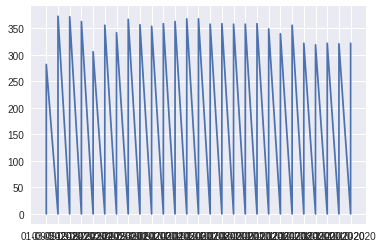

In [ ]:
plt.plot(datac.date[300:],Y[300:])

In [ ]:
datac["date"].unique()

array(['20-08-2020', '23-08-2020', '24-08-2020', '25-08-2020',
       '01-09-2020', '03-09-2020', '05-09-2020', '12-09-2020',
       '18-09-2020', '22-09-2020', '23-09-2020', '24-09-2020',
       '25-09-2020', '30-09-2020', '01-10-2020', '02-10-2020',
       '03-10-2020', '04-10-2020', '05-10-2020', '06-10-2020',
       '07-10-2020', '08-10-2020', '09-10-2020', '10-10-2020',
       '11-10-2020', '12-10-2020', '16-10-2020', '17-10-2020',
       '18-10-2020', '19-10-2020', '20-10-2020'], dtype=object)

In [ ]:
datac.iloc[288:]

,date_time,date,time,temp,temp_median,speed,speed_median,hour,min,sec,speed_mean,temp_mean,speed_overall,speed_overall_mean,temp_overall_mean,speed_overall_median,temp_overall_median,speed_overall_std,temp_overall_std
288,2020-09-01 06:05:00+05:30,01-09-2020,06:05:00,27.59,27.580,7.37,7.390,6,5,0,7.374545,27.577273,5.15561,5.15561,29.538144,5.04,29.62,1.781745,1.01153
289,2020-09-01 06:10:00+05:30,01-09-2020,06:10:00,27.58,27.580,7.39,7.390,6,10,0,7.374545,27.577273,5.15561,5.15561,29.538144,5.04,29.62,1.781745,1.01153
290,2020-09-01 06:15:00+05:30,01-09-2020,06:15:00,27.58,27.580,7.40,7.390,6,15,0,7.374545,27.577273,5.15561,5.15561,29.538144,5.04,29.62,1.781745,1.01153
291,2020-09-01 06:20:00+05:30,01-09-2020,06:20:00,27.57,27.580,7.41,7.390,6,20,0,7.374545,27.577273,5.15561,5.15561,29.538144,5.04,29.62,1.781745,1.01153
292,2020-09-01 06:25:00+05:30,01-09-2020,06:25:00,27.57,27.580,7.42,7.390,6,25,0,7.374545,27.577273,5.15561,5.15561,29.538144,5.04,29.62,1.781745,1.01153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,2020-10-20 11:40:00+05:30,20-10-2020,11:40:00,30.24,30.225,3.10,2.985,11,40,0,3.007500,30.227500,5.15561,5.15561,29.538144,5.04,29.62,1.781745,1.01153
2948,2020-10-20 11:45:00+05:30,20-10-2020,11:45:00,30.25,30.225,3.14,2.985,11,45,0,3.007500,30.227500,5.15561,5.15561,29.538144,5.04,29.62,1.781745,1.01153
2949,2020-10-20 11:50:00+05:30,20-10-2020,11:50:00,30.26,30.225,3.19,2.985,11,50,0,3.007500,30.227500,5.15561,5.15561,29.538144,5.04,29.62,1.781745,1.01153
2950,2020-10-20 11:55:00+05:30,20-10-2020,11:55:00,30.26,30.225,3.24,2.985,11,55,0,3.007500,30.227500,5.15561,5.15561,29.538144,5.04,29.62,1.781745,1.01153


In [ ]:
datac["date"].value_counts()

05-09-2020    504
12-09-2020    216
18-09-2020    216
06-10-2020     72
25-09-2020     72
20-10-2020     72
01-10-2020     72
16-10-2020     72
10-10-2020     72
22-09-2020     72
23-08-2020     72
20-08-2020     72
01-09-2020     72
05-10-2020     72
02-10-2020     72
25-08-2020     72
04-10-2020     72
17-10-2020     72
08-10-2020     72
09-10-2020     72
23-09-2020     72
07-10-2020     72
19-10-2020     72
18-10-2020     72
11-10-2020     72
24-09-2020     72
30-09-2020     72
24-08-2020     72
03-09-2020     72
12-10-2020     72
03-10-2020     72
Name: date, dtype: int64

In [ ]:
datac.columns

Index(['date_time', 'date', 'time', 'temp', 'temp_median', 'speed',
       'speed_median', 'hour', 'min', 'sec', 'speed_mean', 'temp_mean',
       'speed_overall', 'speed_overall_mean', 'temp_overall_mean',
       'speed_overall_median', 'temp_overall_median', 'speed_overall_std',
       'temp_overall_std'],
      dtype='object')

In [ ]:
X=datac[['temp', 'temp_median', 'speed',
       'speed_median', 'hour', 'min', 'sec', 'speed_mean', 'temp_mean',
       'speed_overall', 'speed_overall_mean', 'temp_overall_mean',
       'speed_overall_median', 'temp_overall_median', 'speed_overall_std',
       'temp_overall_std']]

In [ ]:

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
Ytrain.values

array([166, 359,   0, ..., 190, 306, 372])

In [ ]:
trainscaler=MinMaxScaler()
testscaler=MinMaxScaler()
Xtrain=trainscaler.fit_transform(Xtrain)
Xtest=trainscaler.transform(Xtest)
Ytrain=testscaler.fit_transform(Ytrain.values.reshape(-1,1))


In [ ]:
Ytest=testscaler.transform(Ytest.values.reshape(-1,1))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rfr=RandomForestRegressor(random_state=0)

In [ ]:
random_grid={'bootstrap': [True, False],
 'max_depth': [5,10, 15, 20,25,30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [5,10,20,30,60,10]}

In [ ]:
rcv = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, scoring="r2",cv = 4, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rcv.fit(Xtrain,Ytrain)

In [ ]:
best_estimator=rcv.best_estimator_
best_estimator

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
rfr=RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
rfr.fit(Xtrain,Ytrain.reshape(2656,))

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
train_score=rfr.score(Xtrain,Ytrain.reshape(2656,))
print("train_score_r2-->"+str(train_score))

train_score_r2-->0.7660003614201152


In [ ]:
(rfr.predict(Xtrain),Ytrain

(array([0.42697077, 0.93805709, 0.27017003, ..., 0.51755721, 0.28708232,
        0.47087449]), array([[0.44504021],
        [0.96246649],
        [0.        ],
        ...,
        [0.50938338],
        [0.82037534],
        [0.99731903]]))

In [ ]:
test_score=rfr.score(Xtest,Ytest.reshape(296,))
print("test_score_r2-->"+str(test_score))

test_score_r2-->0.7861874686471999
